# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [2]:
# Importing all libraries required in this notebook
from pyforest import*

In [3]:
# Reading data from remote link
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.plot()

In [5]:
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [10]:
df.kurt()

Hours    -1.302343
Scores   -1.443833
dtype: float64

In [11]:
df.cov()

,Hours,Scores
Hours,6.3761,62.331500
Scores,62.3315,639.426667


In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

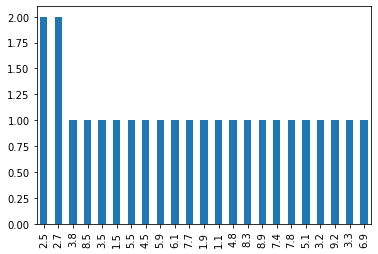

In [13]:
df.Hours.value_counts().plot(kind='bar')

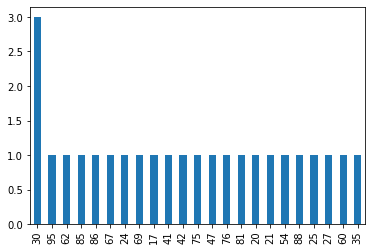

In [14]:
df.Scores.value_counts().plot(kind='bar')

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


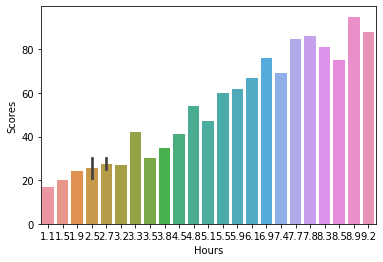

In [15]:
sns.barplot(x="Hours",y="Scores",data=df)

In [16]:
df.isnull().sum()  

Hours     0
Scores    0
dtype: int64

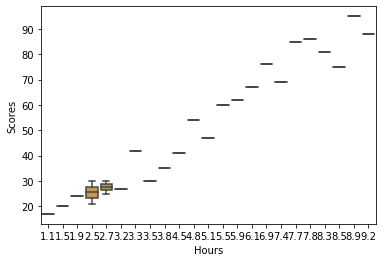

In [17]:
sns.boxplot(x = "Hours", y = "Scores", data = df) 

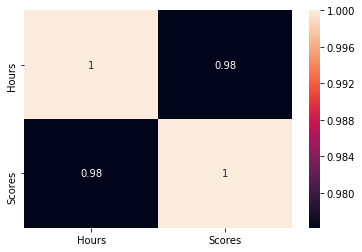

In [18]:
sns.heatmap(df.corr(),annot=True)   

In [19]:
from sklearn import preprocessing
a= np.array(df['Scores'])
normalized_a = preprocessing.normalize([a])
normalized_a

array([[0.07351425, 0.1645319 , 0.09451833, 0.26255091, 0.10502036,
        0.07001358, 0.30805973, 0.21004073, 0.28355498, 0.08751697,
        0.29755769, 0.21704208, 0.14352783, 0.14702851, 0.05951154,
        0.33256448, 0.10502036, 0.08401629, 0.23454548, 0.24154683,
        0.10502036, 0.18903665, 0.12252376, 0.26605159, 0.30105837]])

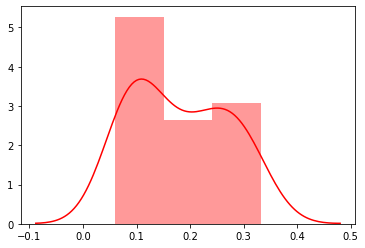

In [20]:
sns.distplot(normalized_a,color="r")    

In [21]:
for i in df.columns:
    print('Number of unique values in ',i,df[i].nunique())

Number of unique values in  Hours 23
Number of unique values in  Scores 23


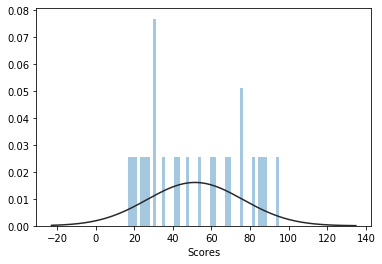

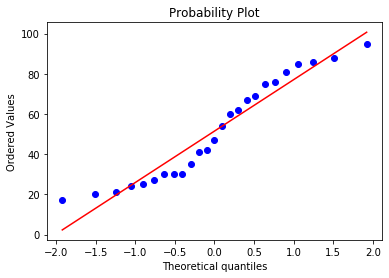

In [22]:
from scipy.stats import norm
from scipy import stats

sns.distplot(df['Scores'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Scores'], plot=plt)  

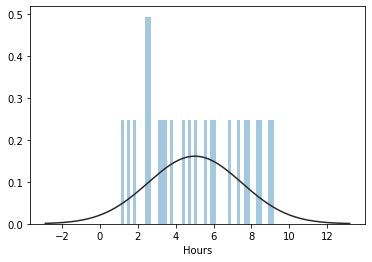

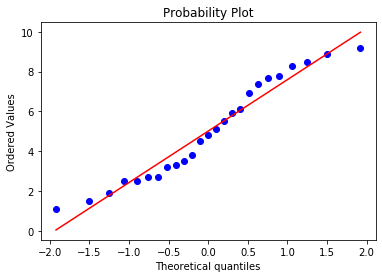

In [23]:
from scipy.stats import norm
from scipy import stats

sns.distplot(df['Hours'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Hours'], plot=plt) 

In [24]:
df1 = df.transform(lambda X: np.log(X))

In [25]:
df1

,Hours,Scores
0,0.916291,3.044522
1,1.629241,3.850148
2,1.163151,3.295837
3,2.140066,4.317488
4,1.252763,3.401197
5,0.405465,2.995732
6,2.219203,4.477337
7,1.704748,4.094345
8,2.116256,4.394449
9,0.993252,3.218876


C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


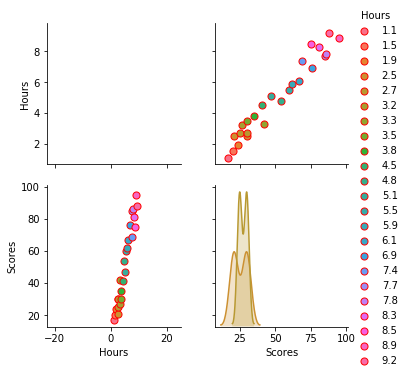

In [26]:
sns.pairplot(df,hue="Hours",diag_kind="kde",plot_kws=dict(s=50, edgecolor="r", linewidth=1))

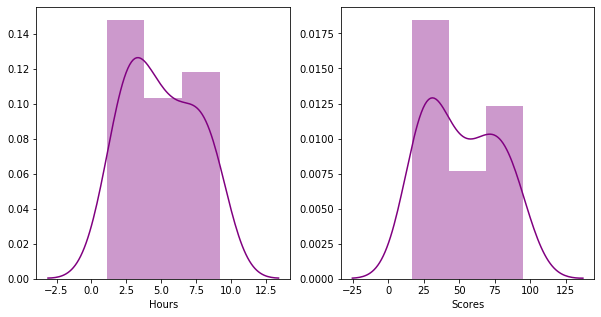

In [27]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.distplot(df.iloc[:,i],kde=True, color='purple')

In [28]:
(df.groupby('Scores').Hours.sum() / sum(df1['Hours']))*100

Scores
17     3.006582
20     4.099885
21     6.833141
24     5.193187
25     7.379792
27     8.746420
30    23.779330
35    10.386374
41    12.299654
42     9.019746
47    13.939607
54    13.119630
60    15.032910
62    16.126212
67    16.672864
69    20.226097
75    23.232679
76    18.859469
81    22.686028
85    21.046074
86    21.319399
88    25.145958
95    24.325981
Name: Hours, dtype: float64

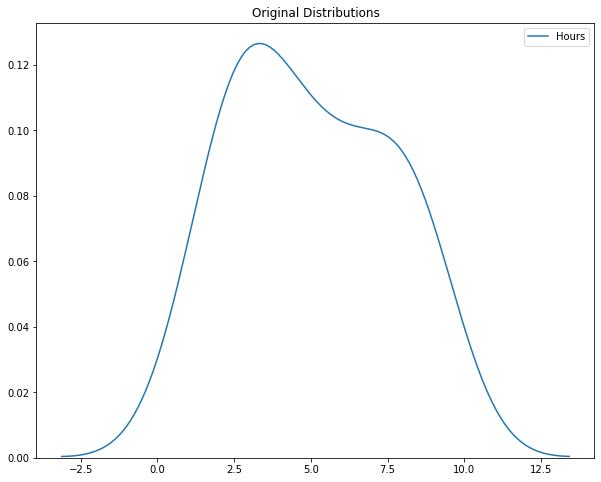

In [29]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['Hours'], ax=ax1)

In [30]:
from scipy.stats import shapiro
stats,p=shapiro(df["Scores"])
print("Statistics =%.3f,p=%.3f"%(stats,p))
alpha=0.05
if p>alpha:
    print("Sample looks guassian(fail to reject H0)")
else:
    print("Sample does not looks guassian(fail to reject H0)")

Statistics =0.917,p=0.043
Sample does not looks guassian(fail to reject H0)


In [31]:
shapiro(df['Hours'])

(0.9401376247406006, 0.1491180658340454)

In [32]:
#since our alpha(0.05) value is greater than our p-value we will reject Ho saying that data is not normally distributed
#Hence our statistical test proves the same. i.e output variable is not normally distributed.

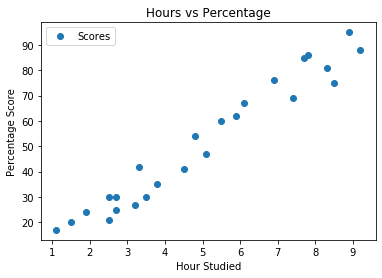

In [33]:
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hour Studied")
plt.ylabel("Percentage Score")
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [16]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.04166667 1.01686527]
 [1.01686527 1.04166667]]


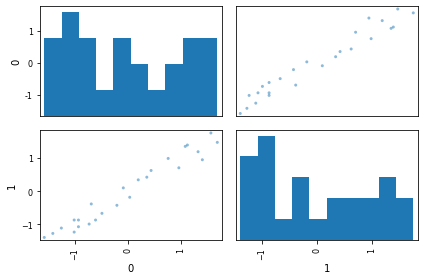

In [17]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (17, 1)
Shape of y_train : (17,)
Shape of x_test : (8, 1)
Shape of y_test : (8,)


In [36]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x_train_minmax = mm_scaler.fit_transform(x_train)
mm_scaler.transform(x_test)


array([[0.04938272],
       [0.25925926],
       [0.77777778],
       [0.17283951],
       [0.59259259],
       [0.33333333],
       [0.09876543],
       [0.82716049]])

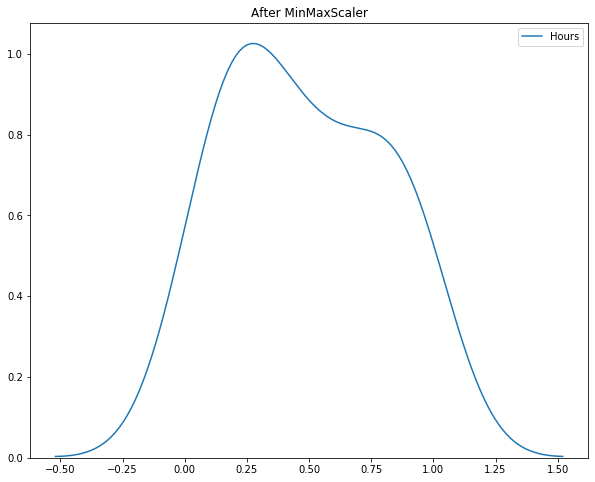

In [37]:
col_names = list(df.columns)
col_names
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

df_mm = pd.DataFrame(df_mm, columns= col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['Hours'], ax=ax1)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [38]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(x_train,y_train)
print(f'R^2 score for train:{model.score(x_train,y_train)}')
print(f'R^2 score for test:{model.score(x_test,y_test)}')
print(model.intercept_)
print(model.coef_)

R^2 score for train:0.9484997422695115
R^2 score for test:0.9568211104435257
2.370815382341881
[9.78856669]


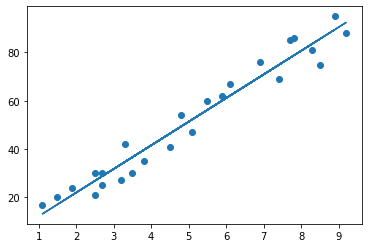

In [40]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [41]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [43]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [44]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


In [45]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
x_constant = sm.add_constant(x)
model =  sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        00:47:03   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""